In [1]:
# Bibek Shiwakoti
# 04/09/2024

### Q1.

Given a signed 32-bit integer x, return x with its digits reversed. If reversing x causes the value to go outside the signed 32-bit integer range [-231, 231 - 1], then return 0.

Assume the environment does not allow you to store 64-bit integers (signed or unsigned).

Example 1:

Input: x = 123

Output: 321

In [1]:
def reverse_integer(x):
    if x == 0:
        return 0
    
    negative = False
    if x < 0:
        negative = True
        x = -x
    
    reversed_x = 0
    while x != 0:
        digit = x % 10
        reversed_x = reversed_x * 10 + digit
        x //= 10
        
    if negative:
        reversed_x = -reversed_x
    
    if reversed_x < -2**31 or reversed_x > 2**31 - 1:
        return 0
    
    return reversed_x


x = 123
print(reverse_integer(x)) 


321


### Q2.

You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).

You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.


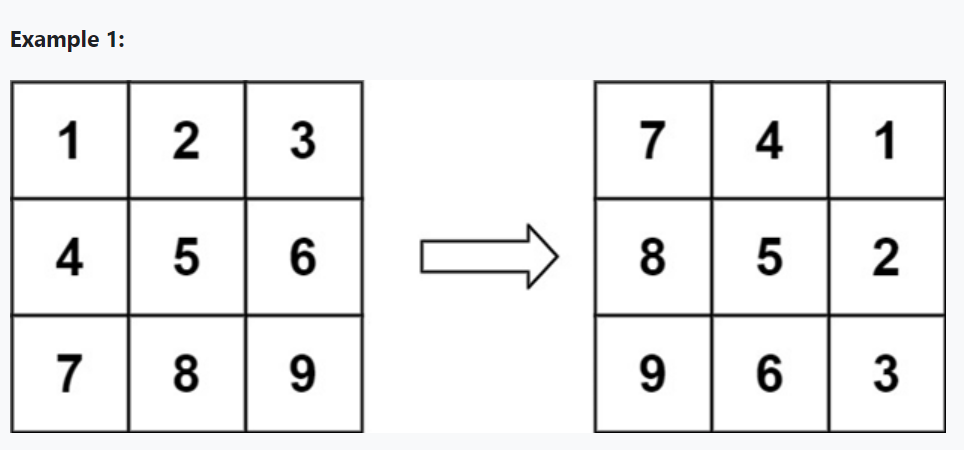




Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [[7,4,1],[8,5,2],[9,6,3]]

In [2]:
def rotate_image(matrix):
    n = len(matrix)
    
    # Step 1: Transpose the matrix
    for i in range(n):
        for j in range(i, n):
            matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    
    # Step 2: Reverse each row
    for i in range(n):
        matrix[i] = matrix[i][::-1]


In [3]:
matrix = [
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]
]

rotate_image(matrix)

# Print the rotated matrix
for row in matrix:
    print(row)

[7, 4, 1]
[8, 5, 2]
[9, 6, 3]


### Q3.

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

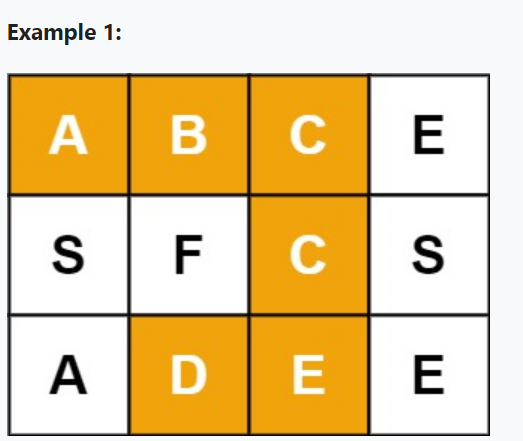


Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"

Output: true

In [7]:
def exist(board, word):
    def dfs(board, i, j, word):
        # If all characters in the word have been found
        if len(word) == 0:
            return True
        
        # Check if the current cell is out of bounds or doesn't match the current character in the word
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or board[i][j] != word[0]:
            return False
        
        # Temporarily mark the current cell as visited
        temp = board[i][j]
        board[i][j] = '#'
        
        # Recursively search in all four directions
        found = dfs(board, i+1, j, word[1:]) or dfs(board, i-1, j, word[1:]) \
                or dfs(board, i, j+1, word[1:]) or dfs(board, i, j-1, word[1:])
        
        # Restore the original value of the cell
        board[i][j] = temp
        
        return found
    
    # Iterate through each cell in the grid to start the DFS search
    for i in range(len(board)):
        for j in range(len(board[0])):
            if dfs(board, i, j, word):
                return True
    return False


board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
# word = "ABCCED"
word = 'ABCES'
# word = 'AFE'

print(exist(board, word))  


True
